## Python for stats - review

In [1]:
import pandas as pd

In [2]:
#Import data to dataframe:
df = pd.read_csv('brain_size.csv', sep=';', index_col=0 , na_values=".")

In [3]:
#columns
df.columns

Index([u'Gender', u'FSIQ', u'VIQ', u'PIQ', u'Weight', u'Height', u'MRI_Count'], dtype='object')

In [4]:
#types
df.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

In [5]:
df.shape

(40, 7)

In [6]:
#sample of data
df.head()

Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
1  Female   133  132  124   118.0    64.5     816932
2    Male   140  150  124     NaN    72.5    1001121
3    Male   139  123  150   143.0    73.3    1038437
4    Male   133  129  128   172.0    68.8     965353
5  Female   137  132  134   147.0    65.0     951545

In [7]:
#How many NaN values?
df.isnull().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

In [8]:
#Replace NaN with mean values (data imputation). All the NaN are male:
df.loc[df['Weight'].isnull(),'Weight'] = df.loc[df['Gender'] == 'Male', 'Weight'].mean()

In [9]:
df.loc[df['Height'].isnull(),'Height'] = df.loc[df['Gender'] == 'Male', 'Height'].mean()

In [10]:
df.isnull().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64

In [11]:
#Descriptive statistics per gender
df.groupby('Gender').describe()

FSIQ     Height     MRI_Count         PIQ         VIQ  \
Gender                                                                      
Female count   20.000000  20.000000  2.000000e+01   20.000000   20.000000   
       mean   111.900000  65.765000  8.626546e+05  110.450000  109.450000   
       std     23.686327   2.288248  5.589356e+04   21.946046   21.670924   
       min     77.000000  62.000000  7.906190e+05   72.000000   71.000000   
       25%     90.250000  64.500000  8.280620e+05   93.000000   90.000000   
       50%    115.500000  66.000000  8.553650e+05  115.000000  116.000000   
       75%    133.000000  66.875000  8.826685e+05  128.750000  129.000000   
       max    140.000000  70.500000  9.913050e+05  147.000000  136.000000   
Male   count   20.000000  20.000000  2.000000e+01   20.000000   20.000000   
       mean   115.000000  71.431579  9.548554e+05  111.600000  115.250000   
       std     24.986312   3.195565  5.591135e+04   23.540335   25.640993   
       min     80.000000  66.300000  8.799870e+05   74.000000   77.000000   
       25%     89.750000  68.950000  9.195292e+05   86.000000   95.250000   
       50%    118.000000  70.965789  9.472415e+05  117.000000  110.500000   
       75%    139.250000  73.625000  9.734960e+05  128.000000  145.000000   
       max    144.000000  77.000000  1.079549e+06  150.000000  150.000000   

                  Weight  
Gender                    
Female count   20.000000  
       mean   137.200000  
       std     16.953807  
       min    106.000000  
       25%    125.750000  
       50%    138.500000  
       75%    146.250000  
       max    175.000000  
Male   count   20.000000  
       mean   166.444444  
       std     18.963184  
       min    132.000000  
       25%    150.250000  
       50%    171.500000  
       75%    180.250000  
       max    192.000000

Exercise
- What is the mean value for VIQ for the full population?
- How many males/females were included in this study?
- What is the average value of MRI counts expressed in log units, for males and females?

In [12]:
#Solution

import numpy as np
print df['VIQ'].mean()
print df.groupby('Gender').count()
print df.groupby('Gender')['MRI_Count'].mean().apply(lambda x:np.log(x))

112.35
        FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
Gender                                           
Female    20   20   20      20      20         20
Male      20   20   20      20      20         20
Gender
Female    13.667769
Male      13.769315
Name: MRI_Count, dtype: float64


## Plotting data

In [13]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

/Users/carlosjarguello/anaconda/envs/insight_project/lib/python2.7/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


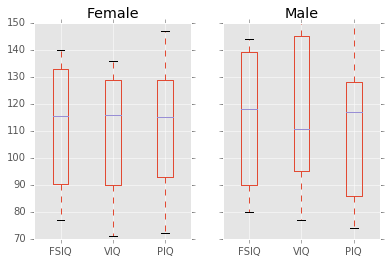

In [14]:
# Box plots of different columns for each gender
df.groupby('Gender').boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

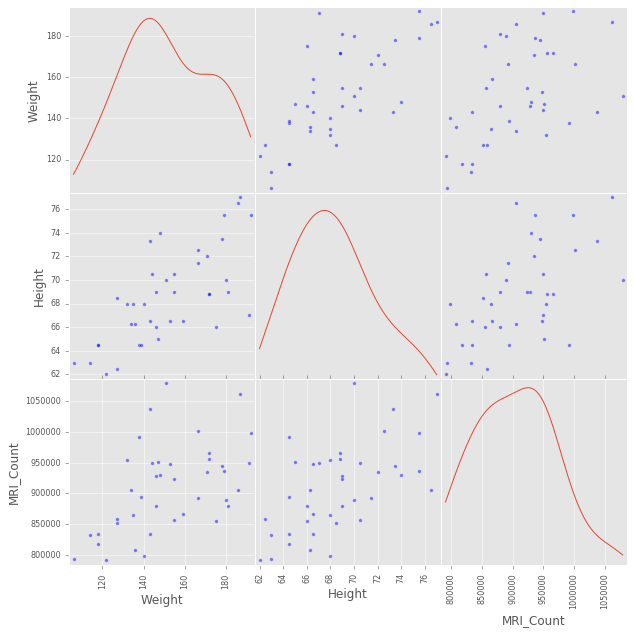

In [15]:
from pandas.tools import plotting
axes = plotting.scatter_matrix(df[['Weight', 'Height', 'MRI_Count']], figsize=(10,10), diagonal='kde', s=50, c = 'b')

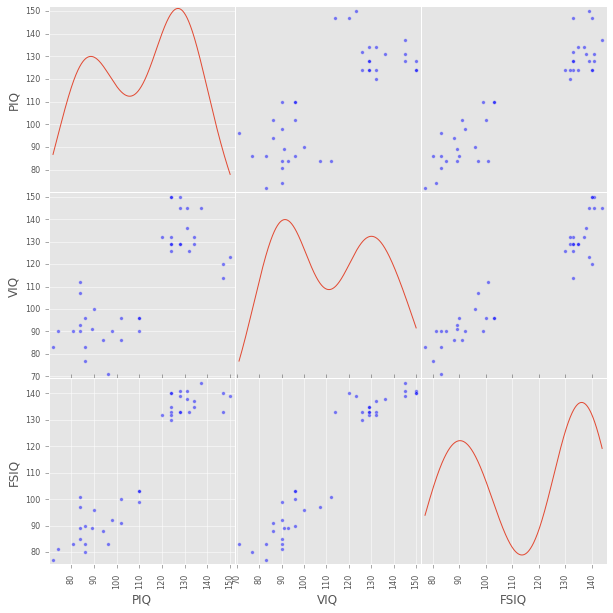

In [16]:
#Two populations: The IQ metrics are bimodal, as if there are 2 sub-populations.
plotting.scatter_matrix(df[['PIQ', 'VIQ', 'FSIQ']], figsize=(10,10), diagonal='kde', s=50, c = 'b')   
plt.show()

Exercise

- Plot the scatter matrix for males only, and for females only. Do you think that the 2 sub-populations correspond to gender?

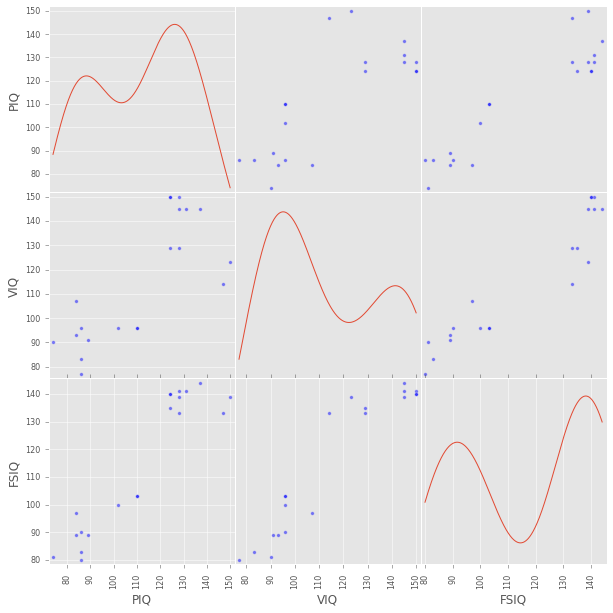

In [17]:
plotting.scatter_matrix(df.loc[df['Gender'] == 'Male', ['PIQ', 'VIQ', 'FSIQ']], figsize=(10,10), diagonal='kde', s=50, c = 'b')   
plt.show()

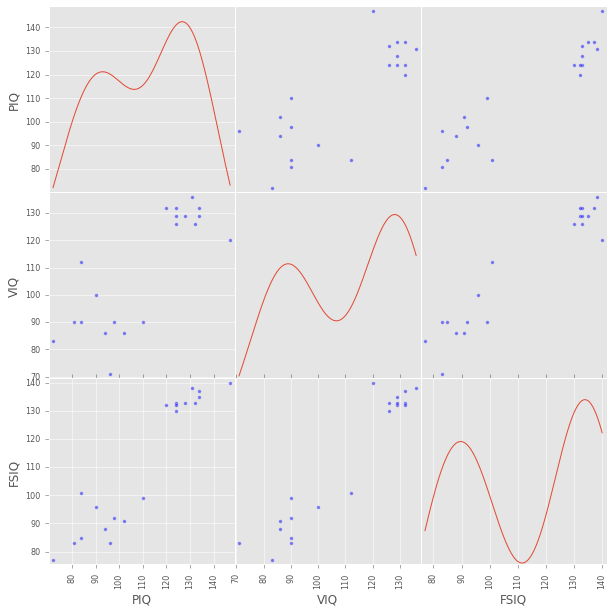

In [18]:
plotting.scatter_matrix(df.loc[df['Gender'] == 'Female', ['PIQ', 'VIQ', 'FSIQ']], figsize=(10,10), diagonal='kde', s=50, c = 'b')   
plt.show()

No, 2 sub-populations, but not divided by gender

## Hypothesis test

PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

In [19]:
from scipy import stats

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help):

In [20]:
stats.ttest_1samp(df['VIQ'],0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [21]:
stats.ttest_ind(df[df['Gender'] == 'Male']['VIQ'], df[df['Gender'] == 'Female']['VIQ'])

Ttest_indResult(statistic=0.77261617232750113, pvalue=0.44452876778583217)

Statistically significant difference.

### Paired tests: repeated measurements on the same indivuals

Bad approach: PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

In [22]:
stats.ttest_ind(df['FSIQ'], df['PIQ'])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

Wrong approach, sample populations not independent. 

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [23]:
stats.ttest_rel(df['FSIQ'], df['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

Or:

In [24]:
stats.ttest_1samp(df['FSIQ'] - df['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

In [25]:
stats.wilcoxon(df['FSIQ'], df['PIQ']) 

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### The corresponding test in the non paired case is the Mann–Whitney U test, scipy.stats.mannwhitneyu().

Exercise

- Test the difference between weights in males and females.
- Use non parametric statistics to test the difference between VIQ in males and females.

In [26]:
stats.ttest_ind(df[df['Gender'] == 'Male']['Weight'], df[df['Gender'] == 'Female']['Weight'])

Ttest_indResult(statistic=5.1415593064929519, pvalue=8.5249785379766596e-06)

In [27]:
stats.wilcoxon(df[df['Gender'] == 'Male']['VIQ'], df[df['Gender'] == 'Female']['VIQ'])

WilcoxonResult(statistic=82.5, pvalue=0.40071152819253142)

### Linear models, multiple factors, and analysis of variance

In [28]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
#gaussian distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data_xy = pd.DataFrame({'x': x, 'y': y})

In [29]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data_xy).fit()

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 19 Feb 2017   Prob (F-statistic):           8.56e-08
Time:                        16:53:29   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

Exercise

- Retrieve the estimated parameters from the model above. Hint: use tab-completion to find the relevent attribute.

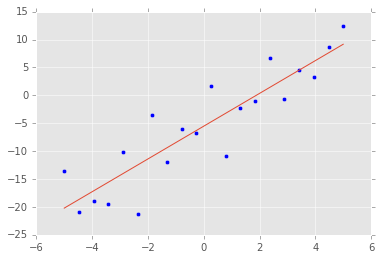

In [31]:
plt.scatter(data_xy.x,data_xy.y)
plt.plot(data_xy.x,data_xy.x*model.params.x+model.params.Intercept) 

In [33]:
# import seaborn as sns
#sns.regplot(x="x", y="y", data=data_xy)

### Categorical variables: comparing groups or multiple categories

In [34]:
model = ols("VIQ ~ Gender + 1", df).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sun, 19 Feb 2017   Prob (F-statistic):              0.445
Time:                        16:53:45   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000        98.704   120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445        -9.397    20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tips on specifying model
Forcing categorical: the ‘Gender’ is automatically detected as a categorical variable, and thus each of its different values are treated as different entities.
An integer column can be forced to be treated as categorical using:

 model = ols('VIQ ~ C(Gender)', data).fit()

Intercept: We can remove the intercept using - 1 in the formula, or force the use of an intercept using + 1.

By default, statsmodels treats a categorical variable with K possible values as K-1 ‘dummy’ boolean variables (the last level being absorbed into the intercept term). This is almost always a good default choice - however, it is possible to specify different encodings for categorical variables (http://statsmodels.sourceforge.net/devel/contrasts.html).

In [36]:
model.params

Intercept         109.45
Gender[T.Male]      5.80
dtype: float64

### Another ols test with brain data:

In [37]:
model = ols("Height ~ Weight + 1", df[df['Gender'] == 'Male']).fit()

In [38]:
model.params

Intercept    60.064245
Weight        0.068295
dtype: float64

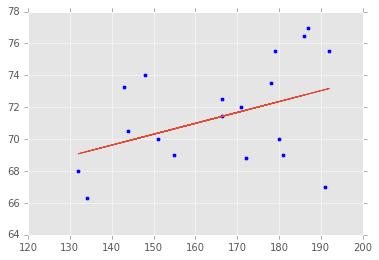

In [39]:
plt.scatter(df[df['Gender'] == 'Male']['Weight'],df[df['Gender'] == 'Male']['Height'])
plt.plot(df[df['Gender'] == 'Male']['Weight'], df[df['Gender'] == 'Male']['Weight']*model.params.Weight+model.params.Intercept)

In [40]:
model.rsquared

0.16425018587118645

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regressor = LinearRegression()

In [43]:
regressor.fit(df[df['Gender'] == 'Male']['Weight'].reshape([20,1]),df[df['Gender'] == 'Male']['Height'].reshape([20,1]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
predicted = regressor.predict(df[df['Gender'] == 'Male']['Weight'].reshape([20,1]))

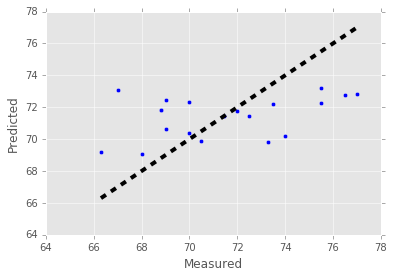

In [45]:
y = df[df['Gender'] == 'Male']['Height']
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [46]:
regressor.score(df[df['Gender'] == 'Male']['Weight'].reshape([20,1]),df[df['Gender'] == 'Male']['Height'].reshape([20,1]))

0.16425018587118834

In [47]:
model.rsquared

0.16425018587118645

In [48]:
print regressor.coef_, regressor.intercept_

[[ 0.06829506]] [ 60.06424517]


In [49]:
model.params

Intercept    60.064245
Weight        0.068295
dtype: float64

Same results sklearn and statsmodel

### Now the iris dataset:

In [50]:
df_iris = pd.read_csv('iris.csv')

In [51]:
df_iris.columns

Index([u'sepal_length', u'sepal_width', u'petal_length', u'petal_width',
       u'name'],
      dtype='object')

In [52]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
name             object
dtype: object

In [53]:
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

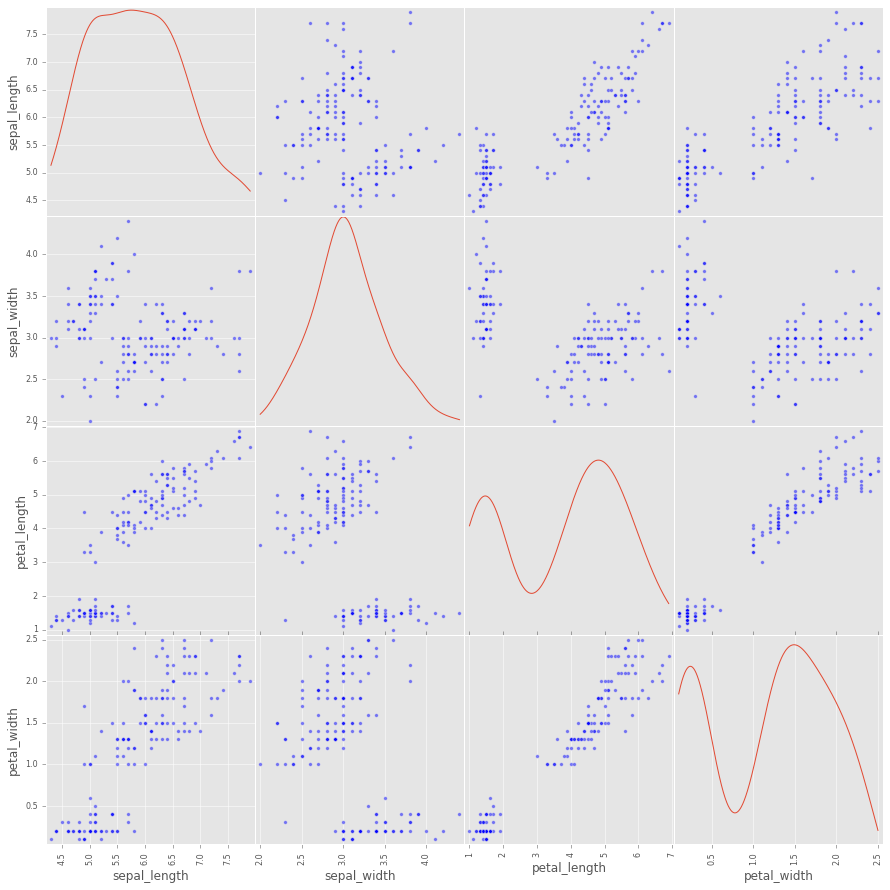

In [54]:
plotting.scatter_matrix(df_iris[df_iris.columns[:-1]], figsize=(15,15), diagonal='kde', s=50, c = 'b')
plt.show()

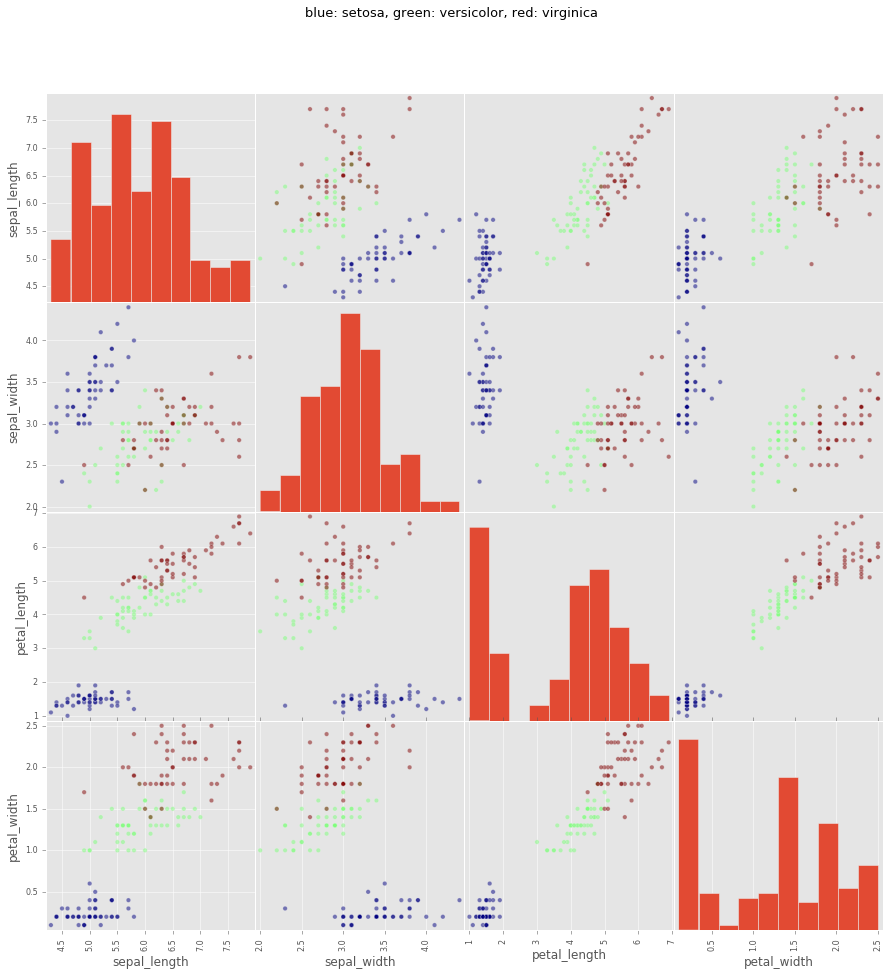

In [55]:
##############################################################################
# Plot a scatter matrix

# Express the names as categories
categories = pd.Categorical(df_iris['name'])

# The parameter 'c' is passed to plt.scatter and will control the color
plotting.scatter_matrix(df_iris, c=categories.codes, marker='o', figsize=(15,15))

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)
plt.show()
##############################################################################

In [56]:
model_2 = ols('sepal_width ~ name + petal_length', df_iris).fit()

In [57]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sun, 19 Feb 2017   Prob (F-statistic):           1.58e-20
Time:                        16:54:00   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              2.9813      0.099     29.989      0.000         2.785     3.178
name[T.versicolor]    -1.4821      0.181     -8.190      0.000        -1.840    -1.124
name[T.virginica]     -1.6635      0.256     -6.502      0.000        -2.169    -1.158
petal_length           0.2983      0.061      4.920      0.000         0.178     0.418
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.885
Skew:                          -0.082   Prob(JB):                        0.236
Kurtosis:                       3.659   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Boxplots and paired differences

Plot boxplots for FSIQ, PIQ, and the paired difference between the two: while the spread (error bars) for FSIQ and PIQ are very large, there is a systematic (common) effect due to the subjects. This effect is cancelled out in the difference and the spread of the difference (“paired” by subject) is much smaller than the spread of the individual measures.

/Users/carlosjarguello/anaconda/envs/insight_project/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


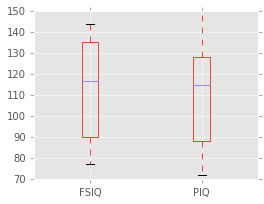

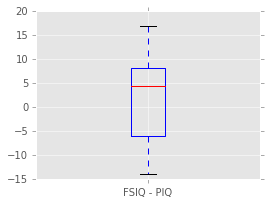

In [66]:
# Box plot of FSIQ and PIQ (different measures od IQ)
plt.figure(figsize=(4, 3))
df.boxplot(column=['FSIQ', 'PIQ'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
df_temp = df['FSIQ'] - df['PIQ']
plt.boxplot(df_temp.values)
plt.xticks((1, ), ('FSIQ - PIQ', ))

plt.show()